# **Manifold of Beta Distributions**

Authors: Sunpeng Duan, Yiliang Chen, Ryan Stofer, Marianne Arriola, and Allen Wang

### Introduction

The differential geometric approach to probability theory and statistics has met increasing interest in theory and applications for the past years. In this approach, probability distributions are seen as elements of a differentiable manifold. And a corresponding metric structure is defined on this kind of mainifold through the choice of a Riemannian metric, such as the Fisher-Rao metric. 


Beta distributions is a family of probability distributions on $[0, 1]$ with density with respect to the Lebesgue measure parameterized by two positive scalars $\alpha, \beta > 0$,
$$p_{\alpha, \beta}(x)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1},\qquad x\in[0,1].$$

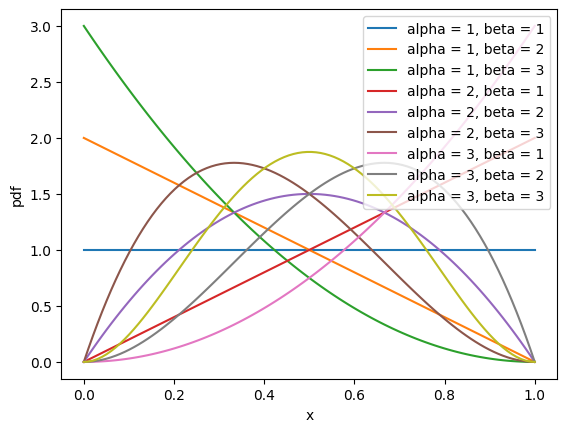

In [3]:
import sys ; sys.path.append('../geomstats/visualization')
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import beta as beta_func

sys.path.append('../geomstats/visualization')

class BetaManifold:
    def __init__(self):
        pass
    def pdf(self, x, alpha, beta_):
        return x**(alpha-1) * (1-x)**(beta_-1) / beta_func(alpha, beta_)

bm = BetaManifold()
x = np.linspace(0, 1, 100)
alpha = [1, 2, 3]
beta = [1, 2, 3]
for a in alpha:
    for b in beta:
        plt.plot(x, bm.pdf(x, a, b), label='alpha = {}, beta = {}'.format(a, b))
plt.xlabel('x')
plt.ylabel('pdf')
plt.legend()
plt.show()

Figure 1: Graph of multiple Beta distributions with varying $\alpha$ and $\beta$ parameters.

### Mathematical definition
Beta manifold is the Riemannian manifold composed of the parameter space $\Theta = \mathbb{R}^∗_+\times\mathbb{R}^∗_+$ and the Fisher metric $g^F$, denoted by the pair $(\mathcal{B},g^F)$, where $\mathcal{B}$ is the family of beta distributions
$$\mathcal{B} = \{\mathcal{B}(\alpha,\beta) = p_{\alpha,\beta}(\cdot)dx, \alpha > 0, \beta > 0\}.$$


Note: Beta manifold is a special case of Dirichlet manifold.

### Real-world Applications

In Bayesian inference, the beta distribution is the conjugate prior probability distribution for several discrete probability distributions, such as binomial distribution. Another application of the beta distribution is to model percentages and proportions in genomic studies (Raineri et. al 2014). A recent research study uses the information geometry of beta distributions to compare, average, and classify histograms of medical data (A. Le Brigant et. al 2021).

The manifold of beta distributions has also been applied to learn high-level information from graphs. Current machine learning methods that learn high-level node embeddings from graphs use heat wavelets that leverage a heat kernel to map node features to lower-dimensional feature spaces. However, Tang et. al demonstrate that these wavelets only preserve graph signals that operate in lower frequency bands, while diminishing graph signals that operate in higher frequency bands (Tang et. al, 2022). This is depicted in the upper row in Figure 2. Preserving graph signals in higher frequency bands is particularly relevant to detecting anomalies in graphs, as anomalies are associated with nodes that dominate higher frequency bands than normal nodes. The authors develop a novel beta wavelet with a kernel function that uses various beta distributions as shown in the lower-left plot in Figure 2. This enables their wavelet to preserve graph signals that cover a wider frequency range as depicted in bottom row of Figure 2.

<img src="figures/beta_manifold_on_graphs.png" alt="beta distributions as applied to cover spectral frequency range of graphs." width="700" />

Figure 2: Beta distributions of varying $\alpha$ and $\beta$ parameters, determined by parameters $p$ and $q$ in the proposed beta wavelet, can be used to develop a new kernel function to perform graph convolutions which cover broader frequencies in the graph spectrum compared to heat wavelets (left column). The choice of kernel function has clear effects on how node information is propagated in the spatial domain throughout abstractions (Fig 2 (a-b)).

### Visualization

In [4]:
import geomstats.backend as gs
import matplotlib.pyplot as plt
from Beta_Visualization import Beta
from geomstats.information_geometry.beta import BetaDistributions

ModuleNotFoundError: No module named 'Beta_Visualization'

In [ ]:
## create an instance of beta distribution
beta = BetaDistributions()
## create an instance of visualization of beta distribution
beta_p = Beta()

#### `Beta` class function: `plot()`

$\texttt{Input}$: A beta manifold point

$\texttt{Output}$: Plots the point on a 2D space

By definition, parameters of beta manifold stays in the upper-right quadrant of Euclidean space as $\alpha, \beta >0$. We can use the `plot()` function to define the support for $\alpha$ and $\beta$ and generate a random point that represents a beta distribution.

In [ ]:
beta_p.plot([10,10])

#### `Beta` class function: `scatter()`

Similar to `plot()`, `scatter()` is capable of plotting manifold representations of *multiple* beta distributions.

$\texttt{Input}$: Set of points

$\texttt{Output}$: A point cloud

In [ ]:
## randomly generate alpha and beta from uniform distribution
points = gs.random.rand(20,2)
beta_p.scatter(points)

#### `Beta` class function: `plot_rendering()`

$\texttt{Input}$: Initial point, range of samples, and sampling period.

$\texttt{Output}$: Plots evenly spaced beta manifold points.

In [ ]:
size = [5,5]
sampling_period = 1

beta_p.plot_rendering(initial_point=[0,1], size=size, sampling_period=sampling_period)

#### Plot of Geodesics
The Fisher–Rao metric is a choice of Riemannian metric in the space of probability distributions.

The fisher information matrix at $\theta$ is defined to be 
$$I(\theta) = [E\partial_il(x,\theta)\partial_jl(x,\theta)]_{i\leq i, j \leq d}$$
where $l(x, \theta) = \log p(x, \theta)$, and its matrix form is 
$$I(\alpha ,\beta) = \begin{bmatrix}
\psi'(\alpha) - \psi'(\alpha+\beta) & -\psi'(\alpha+\beta) \\
\psi'(\alpha + \beta) & \psi(\beta) - \psi'(\alpha + \beta)  
\end{bmatrix}$$
where $\psi$ denotes the digamma function i.e. $\psi(\alpha) = \frac{d}{d\alpha}\ln \Gamma(\alpha)$ 

In the following examples, we give the initial point $(2,3)$ and the end point $(3,2)$, and visualize the Fisher-Rao geodesics.

In [ ]:
point_a = gs.array([2, 3.0])
point_b = gs.array([3.0, 2.0])
tangent_vector = gs.array([0,1])

# define n_points in advanced 
n = 30

# define the color gradient for visualizing the movement
cc = gs.zeros((n, 3))
cc[:, 2] = gs.linspace(0, 1, n)

#### `Beta` class function: `plot_geodesic()`

$\texttt{Input}$: Initial point and end point **OR** initial point and initial tangent vector  
$\quad \quad \quad$ **AND** number of points, step size, and number of steps

$\texttt{Output}$: Plot of Geodesics

In [ ]:
# given initial point and end point 
beta_p.plot_geodesic(initial_point= point_a,
end_point = point_b, 
n_points = n,
color = cc,
n_steps= 50)

In [ ]:
# given initial tangent vector and initial point 
beta_p.plot_geodesic(initial_point= point_a,
initial_tangent_vec= tangent_vector, 
n_points = n,
color = cc,
n_steps= 50)

**How can we better understand the geodesic of the beta manifold?**

Recall that each point of the geodesic defines a beta distribution. Thus, we can obtain an optimal interpolation between the distributions corresponding to beta manifold point A (Beta Distrbution A) and beta manifold point B (Beta Distribution B). The following code chunk below shows the corresponding interpolation between two different probability density functions where `point_a` represents a Beta distribution with parameters $\alpha =2$ and $\beta = 3$ and `point_b` represents another Beta distribution with paramters $\alpha =3$ and $\beta = 2$.

In [ ]:
# Initializes manifold points
point_a = gs.array([2.0, 3.0])
point_b = gs.array([3.0, 2.0])

# Create range of values for interpolation
n_points = 20
t = gs.linspace(0, 1, n_points)

# Compute pdf by first calculating its geodesic
pdfs = beta.point_to_pdf(beta.metric.geodesic(point_a,point_b)(t))
x = gs.linspace(0.0, 1.0, 100)

# Plot all beta pdf interpolations on one plot
fig = plt.figure(figsize=(10, 5))
cc = gs.zeros((n_points, 3))
cc[:, 2] = gs.linspace(0, 1, n_points)
for i in range(n_points):
    plt.plot(x, pdfs(x)[:, i], color=cc[i, :])
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.title("Corresponding interpolation between pdfs")

The geodescics $t \rightarrow (x(t), y(t))$ of the beta parameter space $\Theta$ are solutions of 
\begin{align*}
\ddot{x} + a(x,y)\dot{x}^2 +  b(x,y)\dot{x}\dot{y} + c(x,y)\dot{y}^2 &= 0 \\
\ddot{y} + a(y,x)\dot{y}^2 +  b(y,x)\dot{x}\dot{y} + c(y,x)\dot{x}^2 &= 0
\end{align*}
where 
\begin{align*}
a(x,y) &= \frac{\psi''(x)\psi'(y)-\psi''(x)\psi'(x+y)-\psi'(y)\psi''(x+y)}{2d(x,y)}, \\
b(x,y) &= -\frac{\psi''(x+y)\psi'(y)}{d(x,y)}, \\
c(x,y) &= \frac{\psi''(y)\psi'(x+y)-\psi'(y)\psi''(x+y)}{2d(x,y)}, \\
d(x,y) &= \psi'(x)\psi'(y)-\psi'(x+y)(\psi'(x)+\psi'(y)).
\end{align*}
No closed form for the geodescis is known, but they can be computed numerically by solving above equations. Due to the symmetry of the metric respect to parameters $\alpha$ and $\beta$, the line of equation $x = y$ is geodesic, where the parameterization is fixed by the unique equation given above.

#### Plot of Grids

Definition: The distance between two beta distribution is defined as its geodesic distance. 

#### `Beta` class function: `plot_grid()`

$\texttt{Input}$: Initial point, range of samples, number of points, step size, and number of steps.

$\texttt{Output}$: Draws the grid of the beta manifold.

By computing the geodesic distance of multiple beta distributions, we are able to visualize the grids of the beta manifold as seen below.

In [ ]:
beta_p.plot_grid(initial_point=[1,1],size=[4,5],n_points=3,step=0.689, n_steps= 50)

In [ ]:
beta_p.plot_grid(initial_point=[1,1],size=[3,3],n_points=10,step=1, n_steps= 200)

 #### Plots of vector fields

#### `Beta` class function: `plot_vector_field()`

$\texttt{Input}$: Initial point and a set of tangent vectors.

$\texttt{Output}$: Plot of vector field.

Given a set of initial vectors, we can also plot the vector field on the manifold for a specific beta distribution as seen below.

In [ ]:
center = gs.array([2.0, 2.0])
tan_vecs = gs.array([[-1,1],[1,-1],[1,1],[-1,-1],[-1,0],[0,-1]])
beta_p.plot_vector_field(center, tan_vecs)

#### `Beta` class function: `plot_geodesic_ball()`

$\texttt{Input}$: Initial point and a set of tangent vectors.

$\texttt{Output}$: Plot of Geodesic ball.

Given a set of initial vectors, we can plot the geodesic ball of a various number of tangent vectors for a specific beta distribution as seen below.

In [ ]:
center = gs.array([2.0, 2.0])
n_rays = 50
ray_length = 0.5
beta_p.plot_geodestic_ball(center,n_rays,ray_length)

### Reference

A. Le Brigant and S. Puechmorel, The Fisher-Rao geometry of beta distributions applied to
the study of canonical moments. 2019. <a href="https://hal.archives-ouvertes.fr/hal-02100897" target="_blank">hal-02100897</a>

A. Le Brigant, N. Guigui, S. Rebbah and S. Puechmorel, Classifying histograms of medical data using information geometry of beta distributions. IFAC-PapersOnLine, Vol. 54, No. 9, 514-520, 2021.

Shengping Yang & Zhide Fang (2017) Beta approximation of ratio distribution and its application to next generation sequencing read counts, Journal of Applied Statistics, 44:1,
57-70, DOI: 10.1080/02664763.2016.1158798

J. Tang, J. Li, Z.C. Gao, and J. Li. Rethinking graph neural networks for anomaly detection. IEEE/CVPR, 2022.